In [97]:
#!pip install ruptures

In [98]:
#!pip install hmmlearn 

In [3]:
from matplotlib import pylab as plt
%matplotlib inline
# import scipy.stats
import yfinance as yf
import datetime
import pandas as pd
from prophet import Prophet
import ruptures as rpt
from hmmlearn import hmm
import numpy as np
from sklearn.ensemble import IsolationForest
from datetime import timedelta

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [100]:
def get_oil_price_data(start_date, end_date):
    # Ticker symbol for Crude Oil (Brent) on Yahoo Finance
    ticker_symbol = "BZ=F"

    # Fetch historical data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)

    return data

In [101]:
start_date = "2020-01-01"
end_date = "2024-12-30"
output_csv = "BrentOilPrices.csv"

# Fetch oil price data
oil_data = get_oil_price_data(start_date, end_date)

# Print the fetched data (optional)
print(oil_data)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-02  66.470001  66.570000  65.730003  66.250000  66.250000   25810
2020-01-03  66.290001  69.480003  66.220001  68.599998  68.599998   78848
2020-01-06  69.070000  70.720001  68.190002  68.910004  68.910004   51933
2020-01-07  68.580002  68.739998  67.650002  68.269997  68.269997   41178
2020-01-08  68.470001  71.989998  64.940002  65.440002  65.440002   85232
...               ...        ...        ...        ...        ...     ...
2024-07-29  81.019997  81.720001  79.379997  79.779999  79.779999   22531
2024-07-30  79.839996  79.949997  78.419998  78.629997  78.629997   15035
2024-07-31  79.059998  80.839996  79.000000  80.720001  80.720001   54838
2024-08-01  81.510002  81.800003  79.440002  79.519997  79.519997   44000
2024-08-02  80.040001  80.449997  76.419998  77.440002  77.440002   57145

[1152 rows x 6 columns]


In [102]:
oil_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,66.470001,66.570000,65.730003,66.250000,66.250000,25810
2020-01-03,66.290001,69.480003,66.220001,68.599998,68.599998,78848
2020-01-06,69.070000,70.720001,68.190002,68.910004,68.910004,51933
2020-01-07,68.580002,68.739998,67.650002,68.269997,68.269997,41178
2020-01-08,68.470001,71.989998,64.940002,65.440002,65.440002,85232


In [103]:
true_rates = oil_data['Close']
print(len(true_rates))
true_rates

1152


Date
2020-01-02    66.250000
2020-01-03    68.599998
2020-01-06    68.910004
2020-01-07    68.269997
2020-01-08    65.440002
                ...    
2024-07-29    79.779999
2024-07-30    78.629997
2024-07-31    80.720001
2024-08-01    79.519997
2024-08-02    77.440002
Name: Close, Length: 1152, dtype: float64

In [104]:
# Extract only the 'Close' column
data = oil_data[['Close']].reset_index()
data

,Date,Close
0,2020-01-02,66.250000
1,2020-01-03,68.599998
2,2020-01-06,68.910004
3,2020-01-07,68.269997
4,2020-01-08,65.440002
...,...,...
1147,2024-07-29,79.779999
1148,2024-07-30,78.629997
1149,2024-07-31,80.720001
1150,2024-08-01,79.519997


In [105]:
# Rename columns to 'date' and 'price'
data.columns = ['Date', 'Price']
data

,Date,Price
0,2020-01-02,66.250000
1,2020-01-03,68.599998
2,2020-01-06,68.910004
3,2020-01-07,68.269997
4,2020-01-08,65.440002
...,...,...
1147,2024-07-29,79.779999
1148,2024-07-30,78.629997
1149,2024-07-31,80.720001
1150,2024-08-01,79.519997


In [106]:
# Save data to CSV file
output_csv = "BrentOilPrices_2020-2024.csv"
data.to_csv(output_csv, index=False)
print(f"Data saved to {output_csv}")

Data saved to BrentOilPrices_2020-2024.csv


Change Point Analysis

In [4]:
data = pd.read_csv('data/BrentOilPrices.csv')

In [5]:
data.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

In [9]:
# Initialize the Prophet model
model = Prophet()
model.fit(data)

18:34:24 - cmdstanpy - INFO - Chain [1] start processing
18:34:24 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Make a future dataframe for predictions
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Crude Oil Prices Forecast with Change Points using Prophet')

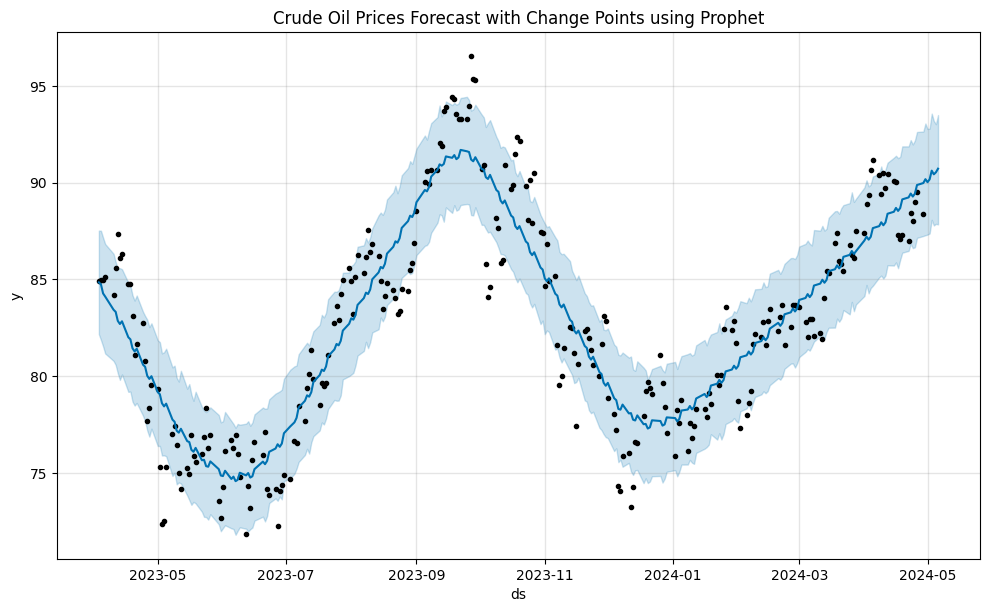

In [8]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Crude Oil Prices Forecast with Change Points using Prophet')

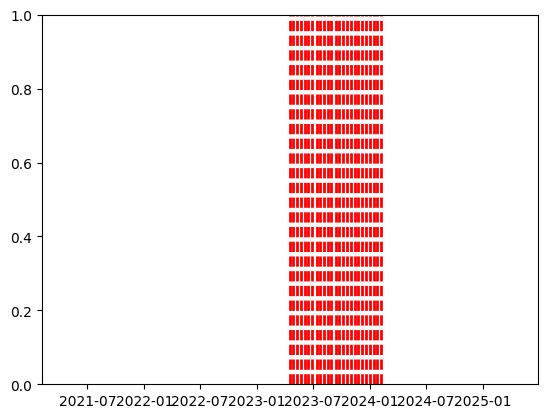

In [236]:
# Add change points to the plot
changepoints = model.changepoints
for changepoint in changepoints:
    plt.axvline(changepoint, color='red', linestyle='--', lw=2)

plt.show()

In [237]:
# Print the identified change points
print("Change points detected by Prophet:")
print(changepoints)

Change points detected by Prophet:
9     2023-04-17
17    2023-04-27
26    2023-05-10
34    2023-05-22
43    2023-06-05
52    2023-06-16
60    2023-06-29
69    2023-07-13
77    2023-07-25
86    2023-08-07
95    2023-08-18
103   2023-08-30
112   2023-09-13
120   2023-09-25
129   2023-10-06
138   2023-10-19
146   2023-10-31
155   2023-11-13
163   2023-11-23
172   2023-12-06
181   2023-12-19
189   2024-01-02
198   2024-01-16
206   2024-01-26
215   2024-02-08
Name: ds, dtype: datetime64[ns]


In [238]:
num_changepoints = len(model.changepoints)
print(num_changepoints)

25


 Bayesian offline changepoint detection - Pelt Algorithm

In [239]:
data = pd.read_csv('data/BrentOilPrices.csv')

In [240]:
signal = data['Price'].values #y = Price

In [241]:
# Define the model for change point detection
model = "rbf"  # Radial Basis Function

In [242]:
# Set up the change point detection algorithm with Pelt
algo = rpt.Pelt(model=model).fit(signal)
# Define a penalty value
penalty = 2

In [243]:
# Perform change point detection
result = algo.predict(pen=penalty)

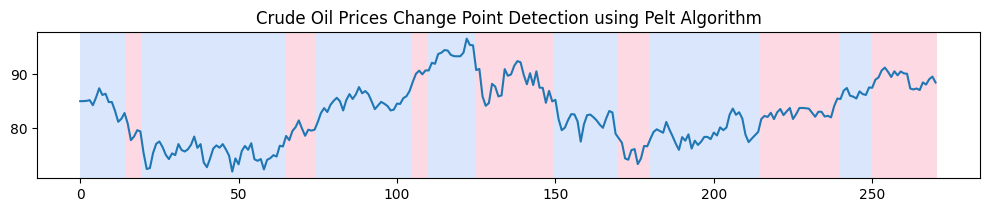

In [244]:
# Plot the results
rpt.display(signal, result)
plt.title('Crude Oil Prices Change Point Detection using Pelt Algorithm')
plt.show()

In [245]:
Changepoint_pelt = []

for index in result[:-1]:  # Exclude the last point as it marks the end of the segment
    change_point_date = data.iloc[index]['Date'] # date=ds
    Changepoint_pelt.append(change_point_date)

# Convert the list to a pandas Series (optional, for easier manipulation)
Changepoint_pelt = pd.Series(Changepoint_pelt)

# Print the change points
print("Change points detected:")
print(Changepoint_pelt)

Change points detected:
0     2023-04-25
1     2023-05-02
2     2023-07-07
3     2023-07-21
4     2023-09-01
5     2023-09-11
6     2023-10-02
7     2023-11-06
8     2023-12-04
9     2023-12-18
10    2024-02-08
11    2024-03-15
12    2024-04-01
dtype: object


In [246]:
# Print the number of change points detected
num_changepoints = len(result) - 1  # Exclude the last point as it marks the end of the segment
print(f"Number of change points detected: {num_changepoints}")

Number of change points detected: 13


Hidden Markov Model (HMM)

In [247]:
data = pd.read_csv('data/BrentOilPrices.csv')

In [248]:
data_reshaped = data['Price'].values.reshape(-1, 1) # y=prices

In [249]:
# Define and fit the Hidden Markov Model
n_components = 3  # Number of hidden states
model = hmm.GaussianHMM(n_components=n_components, covariance_type='diag', n_iter=1000)
model.fit(data_reshaped)

GaussianHMM(n_components=3, n_iter=1000)

In [250]:
# Predict the hidden states
hidden_states = model.predict(data_reshaped)


In [251]:
# Extract change points as indices where the state changes
change_points = np.where(np.diff(hidden_states) != 0)[0] + 1  # +1 to correct for diff offset

In [252]:
# Map indices to dates
change_point_dates = data['Date'].iloc[change_points]

# Print change points as dates
print("Change Points as Dates:")
for date in change_point_dates:
    print(date)

Change Points as Dates:
2023-04-04
2023-04-05
2023-04-06
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-05-01
2023-05-02
2023-05-03
2023-05-04
2023-05-05
2023-05-08
2023-05-09
2023-05-10
2023-05-11
2023-05-12
2023-05-15
2023-05-16
2023-05-17
2023-05-18
2023-05-19
2023-05-22
2023-05-23
2023-05-24
2023-05-25
2023-05-26
2023-05-30
2023-05-31
2023-06-01
2023-06-02
2023-06-05
2023-06-06
2023-06-07
2023-06-08
2023-06-09
2023-06-12
2023-06-13
2023-06-14
2023-06-15
2023-06-16
2023-06-20
2023-06-21
2023-06-22
2023-06-23
2023-06-26
2023-06-27
2023-06-28
2023-06-29
2023-06-30
2023-07-03
2023-07-05
2023-07-06
2023-07-07
2023-07-10
2023-07-11
2023-07-12
2023-07-13
2023-07-14
2023-07-17
2023-07-18
2023-07-19
2023-07-20
2023-07-21
2023-07-24
2023-07-25
2023-07-26
2023-07-27
2023-07-28
2023-07-31
2023-08-01
2023-08-02
2023-08-03
2023-08-04
2023-08-07
2023-08-08
2023-08-09
2023-08-

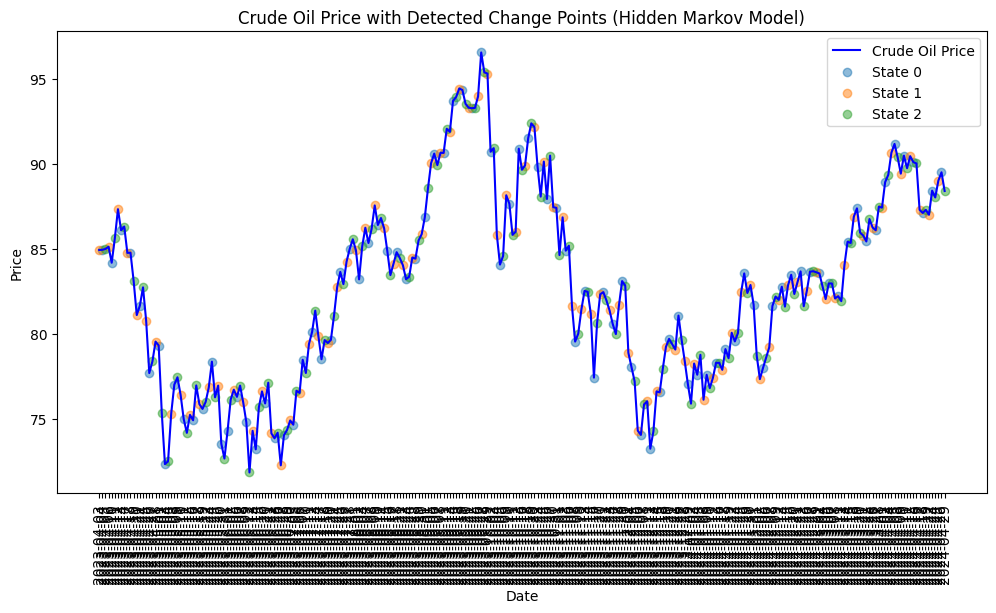

In [254]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Crude Oil Price', color='blue')
for i in range(n_components):
    state_indices = np.where(hidden_states == i)[0]
    plt.scatter(data['Date'].iloc[state_indices], data['Price'].iloc[state_indices], label=f'State {i}', alpha=0.5)

plt.title('Crude Oil Price with Detected Change Points (Hidden Markov Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Isolation Forest

In [255]:
data = pd.read_csv('data/BrentOilPrices.csv')

In [256]:
data.head()

,Date,Price
0,2023-04-03,84.930000
1,2023-04-04,84.940002
2,2023-04-05,84.989998
3,2023-04-06,85.120003
4,2023-04-10,84.180000


In [257]:
model = IsolationForest(contamination=0.01, random_state=1)  # Adjust contamination rate as needed
model.fit(data[['Price']])

IsolationForest(contamination=0.01, random_state=1)

In [258]:
# Predict anomalies
data['anomaly'] = model.predict(data[['Price']])
data

,Date,Price,anomaly
0,2023-04-03,84.930000,1
1,2023-04-04,84.940002,1
2,2023-04-05,84.989998,1
3,2023-04-06,85.120003,1
4,2023-04-10,84.180000,1
...,...,...,...
266,2024-04-23,88.419998,1
267,2024-04-24,88.019997,1
268,2024-04-25,89.010002,1
269,2024-04-26,89.500000,1


In [259]:
# Extract indices of anomalies (change points)
change_points = data[data['anomaly'] == -1].index
num_change_points = len(change_points)
change_point_dates = data.loc[change_points, 'Date']

In [260]:
# Print the number of change points and their dates
print(f"Number of change points detected: {num_change_points}")
print("Dates of detected change points:")
for date in change_point_dates:
    print(date)

Number of change points detected: 3
Dates of detected change points:
2023-06-12
2023-09-27
2023-09-28


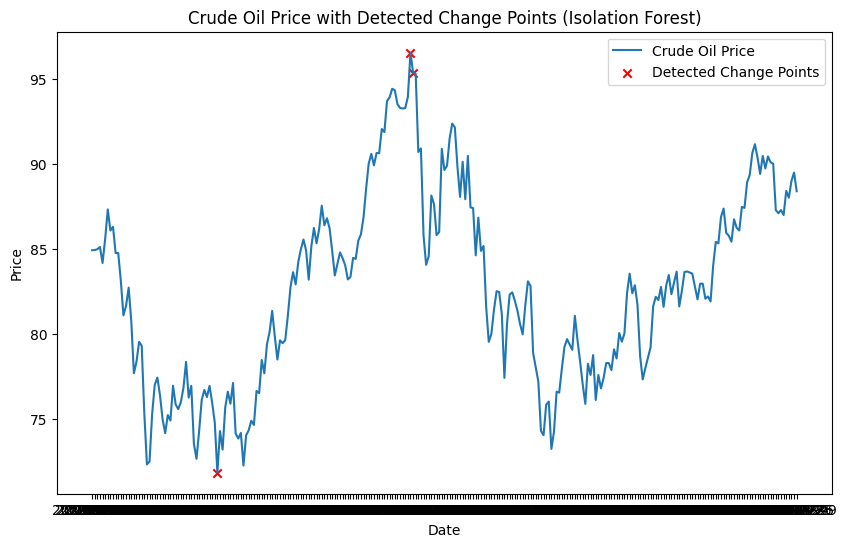

In [261]:
# Optional: Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Crude Oil Price')
plt.scatter(change_point_dates, data.loc[change_points, 'Price'], color='r', label='Detected Change Points', marker='x')
plt.title('Crude Oil Price with Detected Change Points (Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Finding Commomn Change points

In [263]:
# Ensure dates are sorted and in datetime format
change_points_prophet = pd.to_datetime(sorted(changepoints))
change_points_pelt = pd.to_datetime(sorted(Changepoint_pelt))

In [266]:
# Define a threshold within which change points are considered the same
threshold_days = 5

def find_common_change_points(cp1, cp2, threshold=threshold_days):
    common_dates = []
    for date1 in cp1:
        for date2 in cp2:
            if abs((date1 - date2).days) <= threshold:
                common_dates.append(date1)
                break
    return sorted(list(set(common_dates)))

common_change_points = find_common_change_points(change_points_prophet, change_points_pelt) 
print("Common Change Points:", common_change_points)

Common Change Points: [Timestamp('2023-04-27 00:00:00'), Timestamp('2023-07-25 00:00:00'), Timestamp('2023-08-30 00:00:00'), Timestamp('2023-09-13 00:00:00'), Timestamp('2023-10-06 00:00:00'), Timestamp('2023-12-06 00:00:00'), Timestamp('2023-12-19 00:00:00'), Timestamp('2024-02-08 00:00:00')]


In [267]:
datachecked = pd.read_csv('data/BrentOilPrices.csv')

datachecked['Date'] = pd.to_datetime(datachecked['Date'])

# Normalize the `Date` column in the data DataFrame
datachecked['Date'] = datachecked['Date'].dt.normalize()

# Normalize common_change_points
common_change_points = [date.normalize() for date in common_change_points]

# Filter data to match common_change_points and plot
common_change_points_data = datachecked[datachecked['Date'].isin(common_change_points)]
common_change_points_data

,Date,Price
17,2023-04-27,78.370003
77,2023-07-25,83.639999
103,2023-08-30,85.860001
112,2023-09-13,91.879997
129,2023-10-06,84.580002
172,2023-12-06,74.300003
181,2023-12-19,79.230003
215,2024-02-08,81.629997


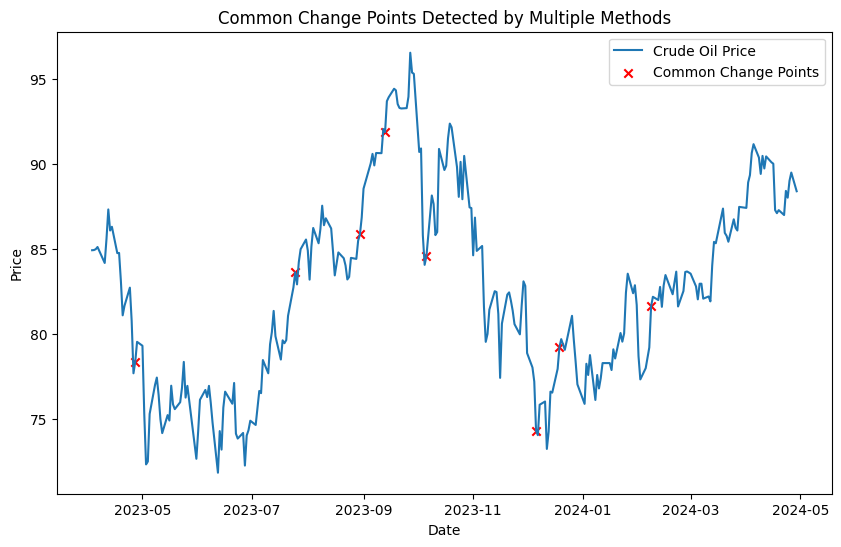

In [268]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(datachecked['Date'], datachecked['Price'], label='Crude Oil Price')
plt.scatter(common_change_points_data['Date'], common_change_points_data['Price'], color='r', label='Common Change Points', marker='x')
plt.title('Common Change Points Detected by Multiple Methods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()